# Solving 10 Queens using pygenetic

In this example we are going to walk through the usage of GAEngine to solve the N-Queens problem 
The objective would be to place queens on single board such that all are in safe position
<b>Each configuration of board represents a potential candidate solution for the problem</b>


## 1. Chromosome Representation

<img src="nQueens-Chromosome.png" style="width:700px;">

For the given chess board, the chromosome is encoded as the row number in which each the queen is present in each column of the chess board. It can also be encoded as the column number in which each the queen is present in each row of the chess board (as done in this code)

This can be easily achieved by using the `RangeFactory` of `pygenetic`. <br/>
The `RangeFactory` takes the following parameters
* minValue = minimum value a gene can take = 0 <br/>
* maxValue = minimum value a gene can take = 9 <br/>
* duplicates = if duplicates are allowed = False <br/>
* noOfGenes = number of genes in the chromosome = 10

In [1]:
from pygenetic import ChromosomeFactory

factory = ChromosomeFactory.ChromosomeRangeFactory(minValue=0,maxValue=9,noOfGenes=10,duplicates=False)

You can also check if the factory works as expected by calling `createChromosome` function and observing the chromosome produced by the factory

In [2]:
# Code to test if factory works as expected
for i in range(5):
    print('Chromosome created: ', factory.createChromosome())

Chromosome created:  [7, 2, 3, 1, 5, 9, 4, 6, 8, 0]
Chromosome created:  [3, 6, 1, 0, 9, 5, 2, 7, 8, 4]
Chromosome created:  [0, 6, 3, 7, 8, 9, 4, 2, 1, 5]
Chromosome created:  [8, 0, 2, 3, 9, 4, 1, 6, 5, 7]
Chromosome created:  [7, 4, 5, 8, 3, 0, 1, 9, 6, 2]


## 2. Fitness function 
Fitness for a given chromosome is the number of non-intersecting queens for that given chess board configuration. Hence the highest fitness for a N X N chess board is N. Hence, we have a maximization GA problem with the aim of achieving fitness value N.

We can easily define such fitness functions in python taking a chromosome as a parameter

In [3]:
def fitness(board):
	fitness = 0
	for i in range(len(board)):
		isSafe = True
		for j in range(len(board)):
			if i!=j:
                # Shouldn't be present on same row/diagonal
				if (board[i] == board[j]) or (abs(board[i] - board[j]) == abs(i-j)):
					isSafe = False
					break
		if(isSafe==True):
			fitness += 1
	return fitness

We need then create a `GAEngine` instance from the `pygenetic` package and set the following
* `factory` = the range factory instance we had intially created
* `population_size = 100` would be a good number for this problem
* `cross_prob = 0.7`
* `mut_prob = 0.2`
* `fitness_type = ('equal', 10)` since our objective in this GA is to achieve the fitness value of 10

In [4]:
from pygenetic import GAEngine
ga = GAEngine.GAEngine(factory,population_size=500,fitness_type=('equal',10),mut_prob = 0.2,cross_prob = 0.8)

We can now add the fitness function we had defined to this `GAEngine` instance

In [5]:
ga.setFitnessHandler(fitness)

## 3. Determing other attributes of the GA

Many Standard Crossover, Mutation, Selection and Fitness functions are present in the `Utils` module of the `pygenetic` package.

In [6]:
from pygenetic import Utils

### Crossover
Traditional crossover methods such as 1-point, 2-point crossover cannot be used since it create duplicate genes in the offsprings. In the popularly used `distinct` crossover, the first half of the chromosome is kept the same while the second half is obtained by sequentially traversing the second chromosome and adding elements only if that element is not already present.
<img src="nQueens-crossover.png" style="width:700px;">

This can be done using the `addCrossoverHandler` of the pygenetic module which takes as parameters
* crossover_function = the crossover function to be used
* weight = the weightage the crossover function needs to be given (mainly used when multiple crossovers are added)

In [7]:
ga.addCrossoverHandler(Utils.CrossoverHandlers.distinct, 4)

### Mutation

The use of the mutation technique of `swap` as shown in the diagram also ensures that each element in the chromosome is a unique number and that there are no duplicates. This is a suitable for mutation function for this problem
<img src="nQueens-mutation.png" style="width:700px">

This can be done using the `addMutationHandler` of the pygenetic module which takes as parameters
* mutation_function = the mutation function to be used
* weight = the weightage the mutation function needs to be given (mainly used when multiple mutations are added)

In [8]:
ga.addMutationHandler(Utils.MutationHandlers.swap,2)

## Selection
The selection function `best` chooses the best (1 - cross_prob) percent of the population. Hence, this function is one of the possible selection handlers which can be used in our genetic algorithm

In [9]:
ga.setSelectionHandler(Utils.SelectionHandlers.best)

## 4. Time to Evolve

This can be easily done using the `evolve` function of the GAEngine instance. It takes the `noOfIterations` as a parameter. Let's evolve it for 100 generations

In [10]:
ga.evolve(100)

mutation_handlers_weights =  [1.0]
crossover_handlers_weights =  [1.0]
Diversity =  0.07594018698949861
New mutation value =  0.39623869492684755
Members left after selection =  500
Best member after selection =  [2, 9, 6, 4, 7, 1, 3, 5, 8, 0]
Best fitness after selection =  8
crossover_indices =  [ 15 459 344 193  34  56 140 267  87 173 264   8 167 398  19 166  86 168
 374 150  13 380  66 180  61  40 257 146 186  35 386 158 104 107 126 195
  20 262  49   4  33 337 135 156 211 191  65 246 142 259  29 298 372  85
 335  47  73 218  45 251 358 214   5  51 300 100  38 331 124 276  44 306
  90 116 244 384  50  31  80 120  94 348 228 445 159 394  52 243 494   0
 182  26 366 371 122  91  96 448 189 334 316 115 106 171 145 329 269  76
  84  43 239 223   6  39 144  10 112 136 196 217 162 245 365 305  14 286
   1  55 280  48  46 102 127  79  60 291  71 359 197 325  99 274 249 303
  58  72  21 411 367  63 309  11 222   9 161  81 430 369 129   2   7 242
 333 317  16 148 224 178 287 354  37 201 110

We can get the best member by using the `best_fitness` attribute of the `GAEngine`. 
It returns a tuple having
* chromsome having best fitness
* best fitness value

In [11]:
best = ga.best_fitness
print(best)

([4, 2, 9, 5, 3, 8, 0, 7, 1, 6], 10)


We can decode the chromosome into a chess board accordingly

In [12]:
def print_board(chromosome):
    for i in chromosome:
        for x in range(i):
            print("-",end=' ') 
        print('Q', end=' ')
        for x in range(len(chromosome)-i-1):
            print("-",end=' ') 
        print()
            
print('Best Board is')
print_board(ga.best_fitness[0])

Best Board is
- - - - Q - - - - - 
- - Q - - - - - - - 
- - - - - - - - - Q 
- - - - - Q - - - - 
- - - Q - - - - - - 
- - - - - - - - Q - 
Q - - - - - - - - - 
- - - - - - - Q - - 
- Q - - - - - - - - 
- - - - - - Q - - - 


## 5. Plotting the Statistics

- The functionality for plotting the best, worst, average fitness values across iterations is present in `plot_statistics` function of statistics.py module. The function takes a list of attributes to be plotted.
- These attributes can be `best-fitness`,`worst-fitness`,`avg-fitness`, `'diversity`, `mutation_rate`
- The diversity and mutation rate values over iterations can also be visualized 

best-fitness [8, 8, 8, 10]
worst-fitness [0, 0, 0, 0]
avg-fitness [2.888, 3.248, 3.33, 3.546]


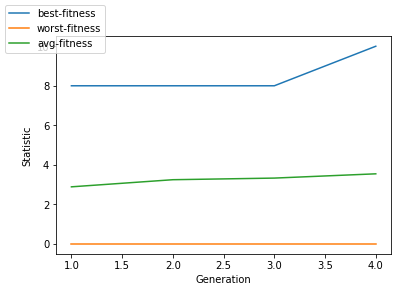

diversity [0.07594018698949861, 0.07947950679263195, 0.08135232018817906, 0.08328125839587194]


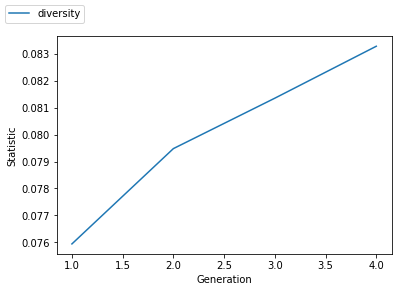

mutation_rate [0.39623869492684755, 0.39606511747565865, 0.3959733313453022, 0.39669626359667287]


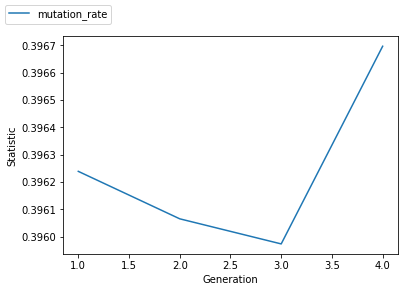

In [13]:
import matplotlib.pyplot as plt
fig = ga.statistics.plot_statistics(['best-fitness','worst-fitness','avg-fitness'])
plt.show()
fig = ga.statistics.plot_statistics(['diversity'])
plt.show()
fig = ga.statistics.plot_statistics(['mutation_rate'])
plt.show()